# Importing Data and Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [40]:
path = r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024'

In [41]:
df_insurance_checked = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_checked.csv'), index_col = False)

In [80]:
country_geo = r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024\02 Data\Original Data/us-states.json'

In [81]:
country_region = r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024\02 Data\Original Data/updated-us-states.json'

In [82]:
country_geo

'C:\\Users\\kuohe\\Medical Cost Personal Datasets 1-30-2024\\02 Data\\Original Data/us-states.json'

In [45]:
# Checking at the JSON file contents:

f = open(r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024\02 Data\Original Data/geoJSON_us_regions',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [46]:
# Checking at the JSON file contents:

r = open(r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024\02 Data\Original Data/geoJSON_us_regions',)
  
# returns JSON object asa dictionary
data = json.load(r)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama', 'region': 'southeast'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'propertie

# 02. Data Wrangling

In [47]:
df_insurance_checked

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


In [48]:
df_insurance_checked.shape

(1337, 8)

In [49]:
df_insurance_checked.columns

Index(['Unnamed: 0', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [50]:
df_insurance_checked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1337 non-null   int64  
 1   age         1337 non-null   int64  
 2   sex         1337 non-null   object 
 3   bmi         1337 non-null   float64
 4   children    1337 non-null   int64  
 5   smoker      1337 non-null   object 
 6   region      1337 non-null   object 
 7   charges     1337 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.7+ KB


In [51]:
df_insurance_checked.dtypes

Unnamed: 0      int64
age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
dtype: object

In [52]:
df_insurance_checked.isnull().sum()

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64

In [53]:
#Deleted unnecessary columns
df_insurance_checked = df_insurance_checked.drop(columns=['Unnamed: 0'])

In [54]:
df_insurance_checked.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1332    False
1333    False
1334    False
1335    False
1336    False
Length: 1337, dtype: bool

# 03. Checking for Extreme Values

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


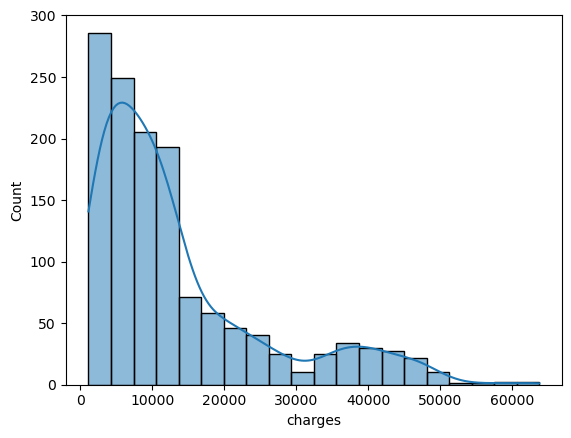

In [55]:
his_price = sns.histplot(df_insurance_checked['charges'], bins = 20, kde = True)

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


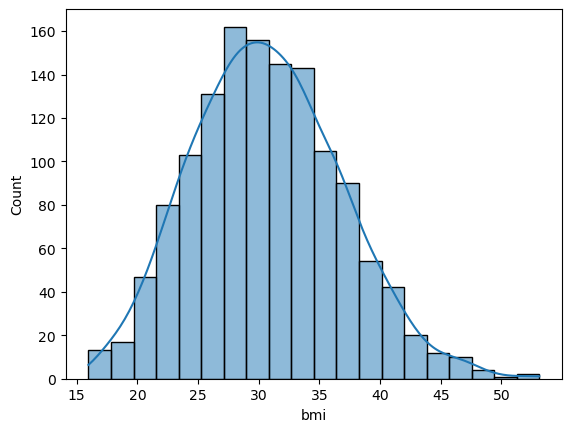

In [56]:
his_price = sns.histplot(df_insurance_checked['bmi'], bins = 20, kde = True)

C:\Users\kuohe\anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


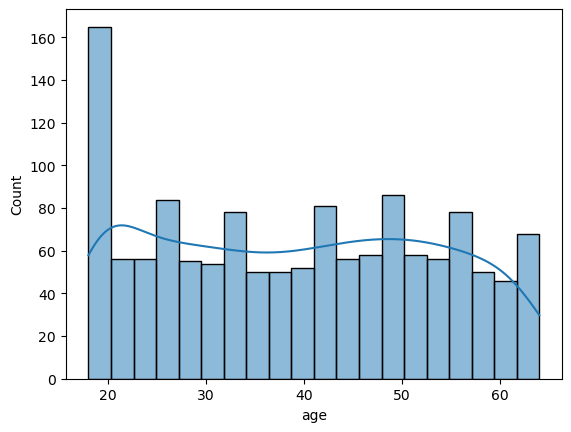

In [57]:
his_price = sns.histplot(df_insurance_checked['age'], bins = 20, kde = True)

# 04 Plotting a Choropleth

In [71]:
# Creating a data frame with just the states and the values for n_charges_per_region

n_charges_per_region = df_insurance_checked[['region','charges']]
n_charges_per_region.head()

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520


In [85]:
# centering the map on the United States
location = [37.0902, -95.7129]  
zoom_start = 4  

country_geo = 'path_to_your_updated_geojson_file/updated-us-states.json'


# Setup a folium map 
map = folium.Map(location=location, zoom_start=zoom_start)

# Choropleth maps 
folium.Choropleth(
    geo_data=country_region, 
    data=n_charges_per_region,
    columns=['region', 'charges'],
    key_on='feature.properties.region',  # Updated to use the 'region' property
    fill_color='YlOrBr', 
    fill_opacity=0.6, 
    line_opacity=0.1,
    legend_name="Charges of Customers per Region"
).add_to(map)

folium.LayerControl().add_to(map)

# Display the map
map


In [96]:
# Save the map as an HTML file
map.save('n_charges_per_region_interactive_map.html')

In [24]:
# Count age per state
age_counts = df_insurance_checked.groupby('region')['age'].count()

In [25]:
age_counts

region
northeast    324
northwest    324
southeast    364
southwest    325
Name: age, dtype: int64

In [26]:
average_ages = df_insurance_checked.groupby('region')['age'].mean()

In [27]:
average_ages

region
northeast    39.268519
northwest    39.259259
southeast    38.939560
southwest    39.455385
Name: age, dtype: float64

In [83]:
average_ages_per_state = df_insurance_checked.groupby('region')['age'].nunique().reset_index(name='average_ages')

In [90]:
# Set the initial location
map_center = [37.0902, -95.7129]
zoom_start = 4  # Adjust the zoom level to your preference

# Setup a folium map
map = folium.Map(location=map_center, zoom_start=zoom_start)

# Add the choropleth layer
folium.Choropleth(
    geo_data=country_region,  # Make sure this is the path to your updated GeoJSON file
    data=average_ages_per_state,  # Your DataFrame with the average age data
    columns=['region', 'average_ages'],  # The columns from your DataFrame
    key_on='feature.properties.region',  # Updated to match the 'region' property in your GeoJSON
    fill_color='YlOrBr',  # You can adjust the color palette as needed
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Age per Region'
).add_to(map)

# Add layer control to toggle on/off
folium.LayerControl().add_to(map)

# Display the map
map


In [97]:
# Save the map as an HTML file
map.save('n_average_ages_per_region_interactive_map.html')

In [93]:
# Now we create a map for bmi
average_bmi_per_region = df_insurance_checked.groupby('region')['bmi'].mean().reset_index()

In [94]:
average_bmi_per_region

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


In [95]:
map_center = [37.0902, -95.7129]  
zoom_start = 4  # A zoom level 

# Setup a folium map
map = folium.Map(location=map_center, zoom_start=zoom_start)

# Add the choropleth layer
folium.Choropleth(
    geo_data=country_region,  # Make sure this is the path to your updated GeoJSON file
    data=average_bmi_per_region,  # Your DataFrame with the BMI data
    columns=['region', 'bmi'],  # The columns from your DataFrame
    key_on='feature.properties.region',  # Updated to match the 'region' property in your GeoJSON
    fill_color='YlOrBr',  # You can adjust the color palette as needed
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average BMI per Region'
).add_to(map)

# Add layer control to toggle on/off
folium.LayerControl().add_to(map)

# Display the map
map


In [98]:
# Save the map as an HTML file
map.save('n_average_bmi_per_region_interactive_map.html')